# Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import tz
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter
import matplotlib.transforms as mtransforms

# Plot Settings

In [18]:
# format style
plt.style.use('fivethirtyeight')
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=18)

# Data

In [2]:
df_502_raw = pd.read_csv('502-data-2019-02-19.csv', header=None)
df_503_raw = pd.read_csv('503-data-2019-02-19.csv', header=None)

In [3]:
df_502_raw.head()

,0,1,2
0,502,Tue Feb 19 2019 00:02:23 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
1,502,Tue Feb 19 2019 00:02:25 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
2,502,Tue Feb 19 2019 00:17:12 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
3,502,Tue Feb 19 2019 00:17:14 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...
4,502,Tue Feb 19 2019 00:17:16 GMT+0000 (UTC),Detection Box (00100010 10111010 00100010 1111...


In [4]:
df_503_raw.head()

,0,1,2
0,503,Tue Feb 19 2019 00:00:01 GMT+0000 (UTC),Detection Box (00100010 01101000)
1,503,Tue Feb 19 2019 00:00:21 GMT+0000 (UTC),Detection Box (01100110 01100000)
2,503,Tue Feb 19 2019 00:00:23 GMT+0000 (UTC),Detection Box (01100110 01100000)
3,503,Tue Feb 19 2019 00:00:24 GMT+0000 (UTC),Detection Box (01100110 01100100)
4,503,Tue Feb 19 2019 00:00:26 GMT+0000 (UTC),Detection Box (01100110 01100000)


# Format and Parse Data

In [5]:
# format of timestamps
t_format = '%b %d %Y %H:%M:%S'
from_zone = tz.gettz('UTC')
to_zone = tz.gettz('America/New_York')

In [6]:
# function to reformat timestamps
def t_rfmt(timestamp):
    # read as datetime object
    tm = datetime.strptime(timestamp, t_format)
    # return datetime converted to local timezone
    return(tm.replace(tzinfo=from_zone).astimezone(to_zone))

In [7]:
# function to parse input by each wire
def wires(reading):
    wire_list = []
    for group in reading.split():
        wire_list.extend(list(group))
    return(wire_list)

In [8]:
# create map of sensor no. and direction
dict_502 = {
    1: 'phase_wb_lft', 
    2: 'phase_eb_str', 
    3: 'phase_NC1',
    4: 'phase_sb_all', 
    5: 'phase_eb_lft', 
    6: 'phase_wb_str',
    7: 'phase_NC2',
    8: 'phase_nb_all',
    9: 'ped_NC1',
    10: 'ped_eb',
    11: 'ped_NC2',
    12: 'ped_NC3',
    13: 'ped_NC4',
    14: 'ped_wb',
    15: 'ped_NC5',
    16: 'ped_nb',
    17: 'loop_wb_lft', 
    18: 'loop_eb_str',
    19: 'loop_NC1',
    20: 'loop_sb_all', 
    21: 'loop_eb_lft', 
    22: 'loop_wb_str',
    23: 'loop_NC2',
    24: 'loop_nb_all',
    25: 'button_NC1',
    26: 'button_NC2',
    27: 'button_NC3',
    28: 'button_NC4',
    29: 'button_NC5',
    30: 'button_NC6',
    31: 'button_NC7',
    32: 'button_NC8'
}

In [9]:
# input sensor data as individual columns
df_502 = pd.DataFrame(list(df_502_raw.loc[:, 2].apply(lambda x: wires(x[15:-1]))), columns=list(range(1, 33)))
# rename columns based on dictionary
df_502.columns = [dict_502[x] for x in df_502.columns]
# convert data type to integers
df_502 = df_502.astype(int)
# insert column for timestamp
df_502.insert(0, 'timestamp', df_502_raw.loc[:, 1].apply(lambda x: t_rfmt(x[4:-15])))
# sort observations by timestamp
df_502.sort_values(by='timestamp', inplace=True)
df_502.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,ped_NC1,...,loop_NC2,loop_nb_all,button_NC1,button_NC2,button_NC3,button_NC4,button_NC5,button_NC6,button_NC7,button_NC8
6183,2019-02-18 19:00:21-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
6184,2019-02-18 19:00:23-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
25335,2019-02-18 19:00:24-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
6185,2019-02-18 19:00:26-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
25336,2019-02-18 19:00:28-05:00,0,1,1,0,0,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1


In [10]:
# create map of sensor no. and direction
dict_503 = {
    1: 'phase_wb_lft', 
    2: 'phase_eb_str', 
    3: 'phase_NC1',
    4: 'phase_sb_all', 
    5: 'phase_eb_lft', 
    6: 'phase_wb_str',
    7: 'phase_NC2',
    8: 'phase_nb_all',
    9: 'loop_wb_lft', 
    10: 'loop_eb_str',
    11: 'loop_NC1',
    12: 'loop_sb_all', 
    13: 'loop_eb_lft', 
    14: 'loop_wb_str',
    15: 'loop_NC2',
    16: 'loop_nb_all'
}

In [11]:
# input sensor data as individual columns
df_503 = pd.DataFrame(list(df_503_raw.loc[:, 2].apply(lambda x: wires(x[15:-1]))), columns=list(range(1, 17)))
# rename columns based on dictionary
df_503.columns = [dict_503[x] for x in df_503.columns]
# convert data type to integers
df_503 = df_503.astype(int)
# insert column for timestamp
df_503.insert(0, 'timestamp', df_503_raw.loc[:, 1].apply(lambda x: t_rfmt(x[4:-15])))
# sort observations by timestamp
df_503.sort_values(by='timestamp', inplace=True)
df_503.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,loop_wb_lft,loop_eb_str,loop_NC1,loop_sb_all,loop_eb_lft,loop_wb_str,loop_NC2,loop_nb_all
0,2019-02-18 19:00:01-05:00,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0
1,2019-02-18 19:00:21-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0
2,2019-02-18 19:00:23-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0
3,2019-02-18 19:00:24-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
4,2019-02-18 19:00:26-05:00,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0


# No Count Columns

In [12]:
# check for no count columns
for column in df_502.columns[1:]:
    print(column, ': ', df_502[column].unique())

phase_wb_lft :  [0 1]
phase_eb_str :  [1 0]
phase_NC1 :  [1]
phase_sb_all :  [0 1]
phase_eb_lft :  [0 1]
phase_wb_str :  [1 0]
phase_NC2 :  [1]
phase_nb_all :  [0 1]
ped_NC1 :  [1]
ped_eb :  [0 1]
ped_NC2 :  [1]
ped_NC3 :  [1]
ped_NC4 :  [1]
ped_wb :  [0 1]
ped_NC5 :  [1]
ped_nb :  [0 1]
loop_wb_lft :  [0 1]
loop_eb_str :  [0]
loop_NC1 :  [1]
loop_sb_all :  [0 1]
loop_eb_lft :  [0 1]
loop_wb_str :  [0 1]
loop_NC2 :  [1]
loop_nb_all :  [0 1]
button_NC1 :  [1]
button_NC2 :  [1]
button_NC3 :  [1]
button_NC4 :  [1]
button_NC5 :  [1]
button_NC6 :  [1]
button_NC7 :  [1]
button_NC8 :  [1]


In [13]:
# check for no count columns
for column in df_503.columns[1:]:
    print(column, ': ', df_503[column].unique())

phase_wb_lft :  [0 1]
phase_eb_str :  [0 1]
phase_NC1 :  [1]
phase_sb_all :  [0 1]
phase_eb_lft :  [0 1]
phase_wb_str :  [0 1]
phase_NC2 :  [1]
phase_nb_all :  [0 1]
loop_wb_lft :  [0 1]
loop_eb_str :  [1 0]
loop_NC1 :  [1]
loop_sb_all :  [0 1]
loop_eb_lft :  [1 0]
loop_wb_str :  [0 1]
loop_NC2 :  [0 1]
loop_nb_all :  [0 1]


# 502 Plots

In [14]:
df_502_plot = df_502.copy()
# replace all 0 values with None
df_502_plot.iloc[:, 1:] = df_502_plot.iloc[:, 1:].replace(to_replace=[0], value=[None])
df_502_plot.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,ped_NC1,...,loop_NC2,loop_nb_all,button_NC1,button_NC2,button_NC3,button_NC4,button_NC5,button_NC6,button_NC7,button_NC8
6183,2019-02-18 19:00:21-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
6184,2019-02-18 19:00:23-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
25335,2019-02-18 19:00:24-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
6185,2019-02-18 19:00:26-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1
25336,2019-02-18 19:00:28-05:00,None,1,1,None,None,1,1,None,1,...,1,None,1,1,1,1,1,1,1,1


## Plot Function

In [15]:
myFmt = DateFormatter("%H")

In [22]:
def traff_plot(t_stamp, phase, loop):
    ax.scatter(t_stamp, loop)
    ax.xaxis.set_major_locator(dates.HourLocator())
    ax.xaxis.set_major_formatter(myFmt)
    ax.set_xlabel('Hour')
    ax.set_xlim(min(t_stamp), max(t_stamp))
    ax.set_yticks([])
    ax.set_ylim(0.5, 1.5)
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between(t_stamp, 0, 1, where=phase == 1, facecolor='green', alpha=0.5, transform=trans)
    return(ax)

## Eastbound Straight

In [33]:
df_502_plot['timestamp'][:500]

6183    2019-02-18 19:00:21-05:00
6184    2019-02-18 19:00:23-05:00
25335   2019-02-18 19:00:24-05:00
6185    2019-02-18 19:00:26-05:00
25336   2019-02-18 19:00:28-05:00
25337   2019-02-18 19:00:30-05:00
6186    2019-02-18 19:00:32-05:00
6187    2019-02-18 19:00:34-05:00
6188    2019-02-18 19:00:36-05:00
28546   2019-02-18 19:00:38-05:00
28547   2019-02-18 19:00:40-05:00
44704   2019-02-18 19:00:41-05:00
44949   2019-02-18 19:00:43-05:00
44950   2019-02-18 19:00:45-05:00
44705   2019-02-18 19:00:47-05:00
35085   2019-02-18 19:00:49-05:00
28548   2019-02-18 19:00:51-05:00
28549   2019-02-18 19:00:53-05:00
28550   2019-02-18 19:00:55-05:00
28551   2019-02-18 19:00:57-05:00
35086   2019-02-18 19:00:59-05:00
28552   2019-02-18 19:01:00-05:00
28553   2019-02-18 19:01:03-05:00
28554   2019-02-18 19:01:06-05:00
28555   2019-02-18 19:01:07-05:00
28556   2019-02-18 19:01:09-05:00
28557   2019-02-18 19:01:11-05:00
28558   2019-02-18 19:01:13-05:00
28559   2019-02-18 19:01:15-05:00
28560   2019-0

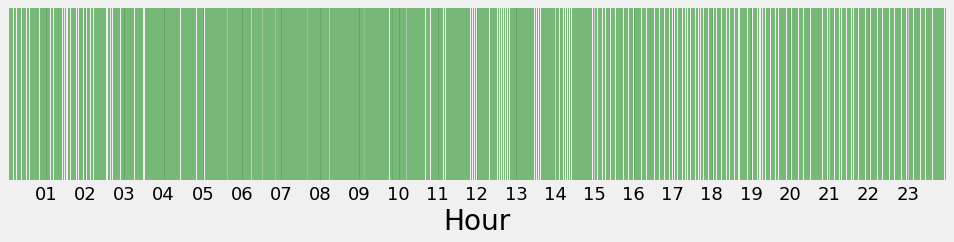

In [27]:
# no loop data!
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_502_plot['timestamp']), df_502_plot['phase_eb_str'], df_502_plot['loop_eb_str']);

## Eastbound Left

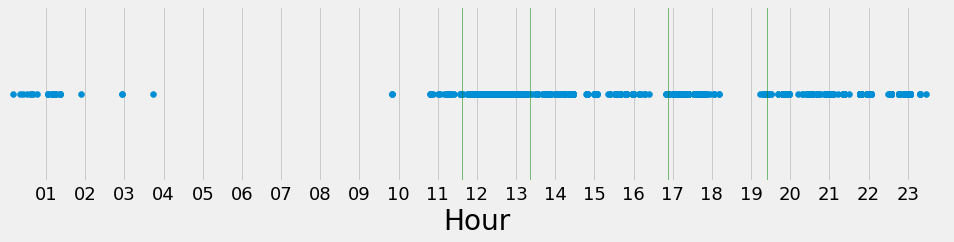

In [28]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_502_plot['timestamp']), df_502_plot['phase_eb_lft'], df_502_plot['loop_eb_lft']);

## Westbound Straight

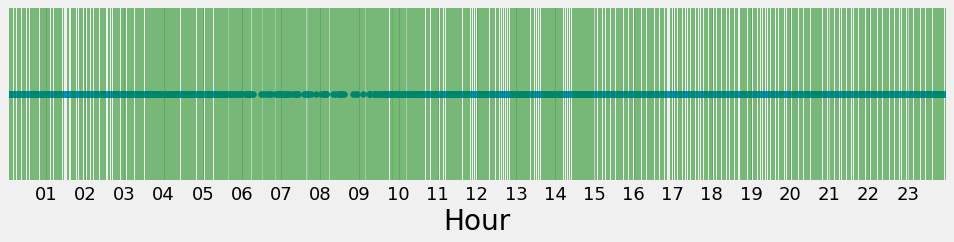

In [29]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_502_plot['timestamp']), df_502_plot['phase_wb_str'], df_502_plot['loop_wb_str']);

## Westbound Left

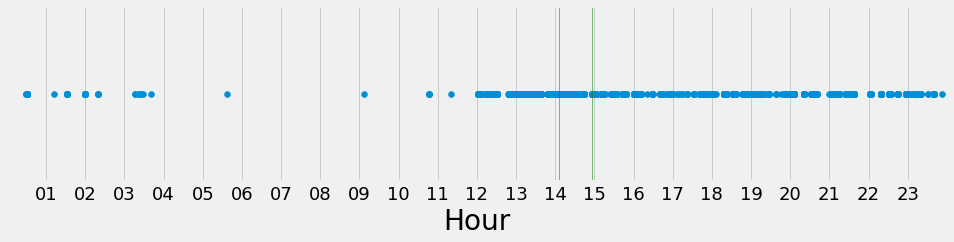

In [30]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_502_plot['timestamp']), df_502_plot['phase_wb_lft'], df_502_plot['loop_wb_lft']);

## Northbound

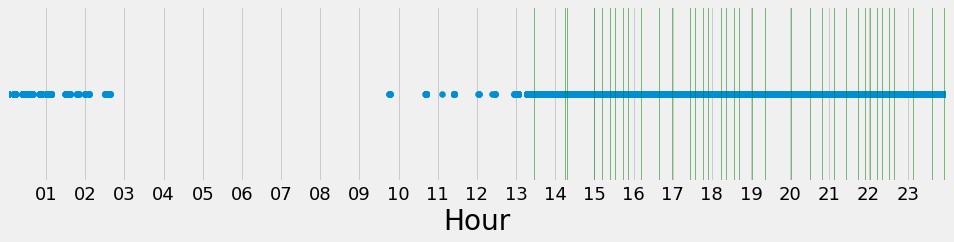

In [31]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_502_plot['timestamp']), df_502_plot['phase_nb_all'], df_502_plot['loop_nb_all']);

## Southbound

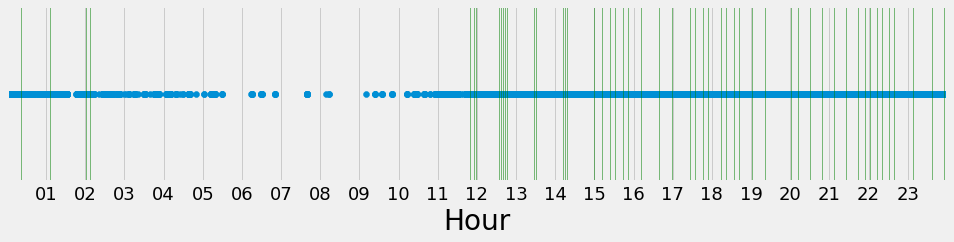

In [32]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_502_plot['timestamp']), df_502_plot['phase_sb_all'], df_502_plot['loop_sb_all']);

# 503 Plots

In [36]:
df_503_plot = df_503.copy()
# replace all 0 values with None
df_503_plot.iloc[:, 1:] = df_503_plot.iloc[:, 1:].replace(to_replace=[0], value=[None])
df_503_plot.head()

,timestamp,phase_wb_lft,phase_eb_str,phase_NC1,phase_sb_all,phase_eb_lft,phase_wb_str,phase_NC2,phase_nb_all,loop_wb_lft,loop_eb_str,loop_NC1,loop_sb_all,loop_eb_lft,loop_wb_str,loop_NC2,loop_nb_all
0,2019-02-18 19:00:01-05:00,None,None,1,None,None,None,1,None,None,1,1,None,1,None,None,None
1,2019-02-18 19:00:21-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,None,None,None
2,2019-02-18 19:00:23-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,None,None,None
3,2019-02-18 19:00:24-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,1,None,None
4,2019-02-18 19:00:26-05:00,None,1,1,None,None,1,1,None,None,1,1,None,None,None,None,None


## Eastbound Straight

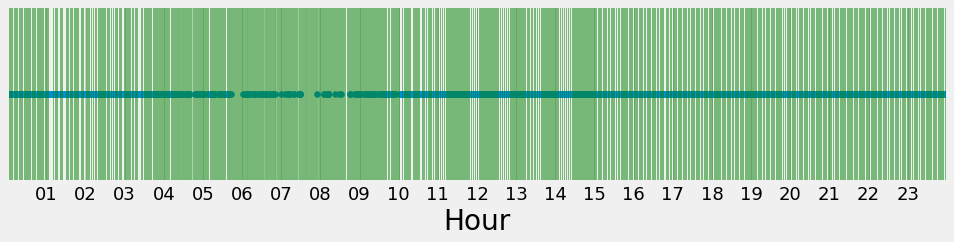

In [38]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_503_plot['timestamp']), df_503_plot['phase_eb_str'], df_503_plot['loop_eb_str']);

## Eastbound Left

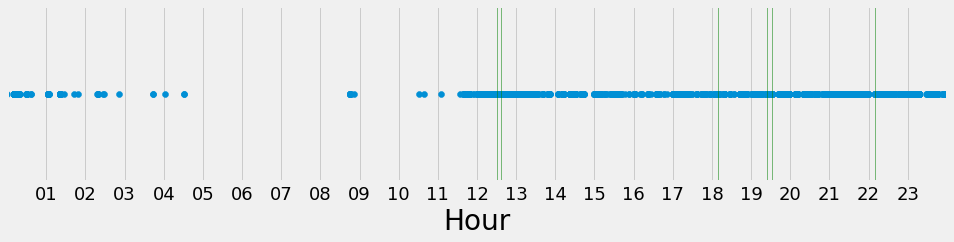

In [40]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_503_plot['timestamp']), df_503_plot['phase_eb_lft'], df_503_plot['loop_eb_lft']);

## Westbound Straight

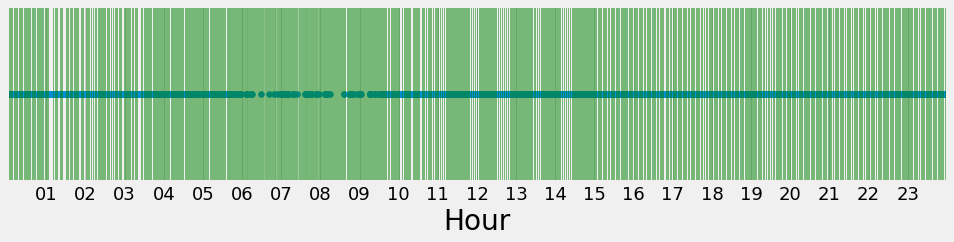

In [41]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_503_plot['timestamp']), df_503_plot['phase_wb_str'], df_503_plot['loop_wb_str']);

## Westbound Left

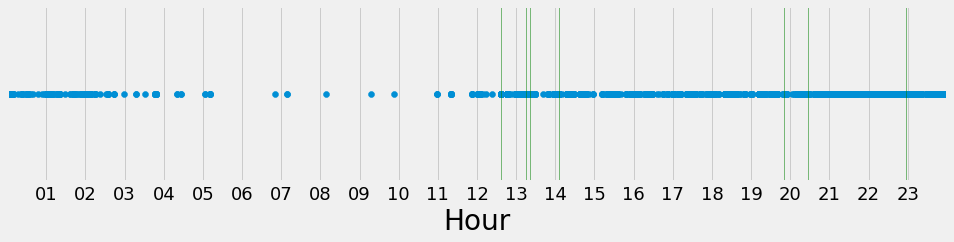

In [42]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_503_plot['timestamp']), df_503_plot['phase_wb_lft'], df_503_plot['loop_wb_lft']);

## Northbound

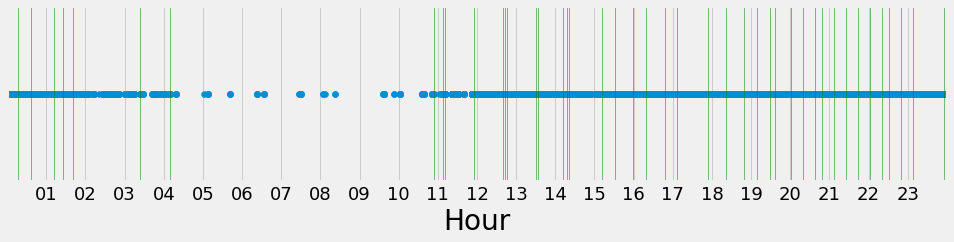

In [39]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_503_plot['timestamp']), df_503_plot['phase_nb_all'], df_503_plot['loop_nb_all']);

## Southbound

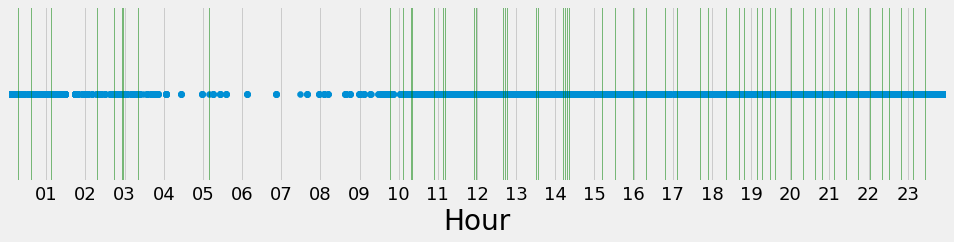

In [37]:
fig, ax = plt.subplots(figsize=(15, 3))
traff_plot(dates.date2num(df_503_plot['timestamp']), df_503_plot['phase_sb_all'], df_503_plot['loop_sb_all']);